<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [4]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
341,2022-08-06,The Ten Commandments,Movie,7.9,220,1956,"Adventure, Drama, Family, History",77890,1956-10-05 00:00:00,Cecil B. DeMille,To watch with mom
342,2022-04-08,Gone with the Wind,Movie,8.2,238,1939,"Drama, Romance, War",334371,1939-12-15 00:00:00,"Sam Wood, George Cukor, Victor Fleming",Not classified
343,2022-02-18,The Greatest Story Ever Told,Movie,6.6,260,1965,"Biography, Drama, History",11934,1965-02-15 00:00:00,"George Stevens, Jean Negulesco",To watch with mom
344,2020-11-26,Gettysburg,Movie,7.6,271,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom
345,2022-09-15,Novecento,Movie,7.6,317,1976,"Drama, History",27289,1976-05-21 00:00:00,Bernardo Bertolucci,To watch with mom


In [5]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(346, 11)

In [6]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date added      346 non-null    datetime64[ns]
 1   Title           346 non-null    object        
 2   Title Type      346 non-null    object        
 3   IMDb Rating     345 non-null    float64       
 4   Runtime (mins)  346 non-null    int64         
 5   Year            346 non-null    int64         
 6   Genres          346 non-null    object        
 7   Num Votes       346 non-null    int64         
 8   Release Date    346 non-null    object        
 9   Directors       342 non-null    object        
 10  Status          341 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 29.9+ KB


In [7]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

,Date added,IMDb Rating,Runtime (mins),Year,Num Votes
count,346,345.000000,346.000000,346.000000,3.460000e+02
mean,2022-09-03 06:14:33.988439296,6.685797,115.973988,1988.465318,8.690462e+04
min,2020-04-29 00:00:00,4.500000,73.000000,1927.000000,0.000000e+00
25%,2021-11-09 06:00:00,6.100000,99.000000,1980.000000,3.301000e+03
50%,2022-07-04 00:00:00,6.700000,109.000000,1991.000000,1.660250e+04
75%,2023-05-24 18:00:00,7.300000,120.000000,1998.000000,6.909825e+04
max,2025-01-19 00:00:00,9.000000,317.000000,2024.000000,2.871665e+06
std,NaN,0.824234,30.115563,16.648113,2.366770e+05


# **Basic column data plotting**

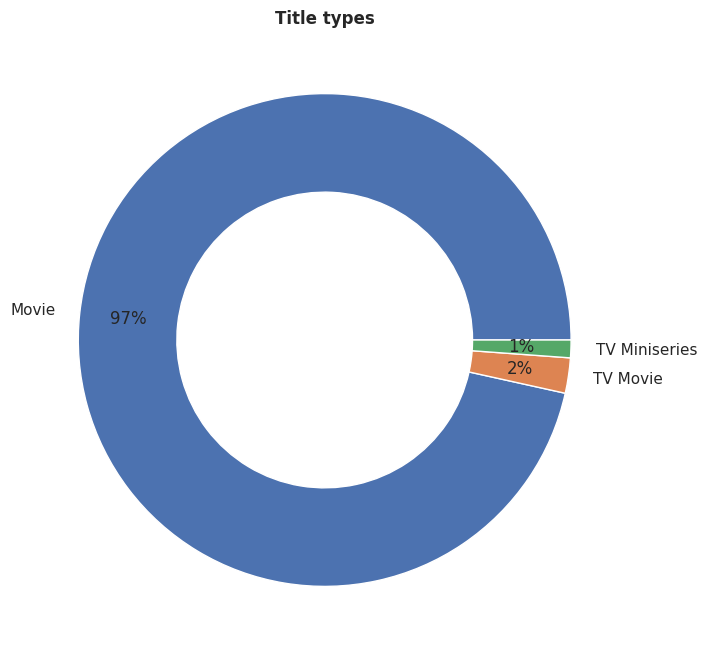

In [8]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

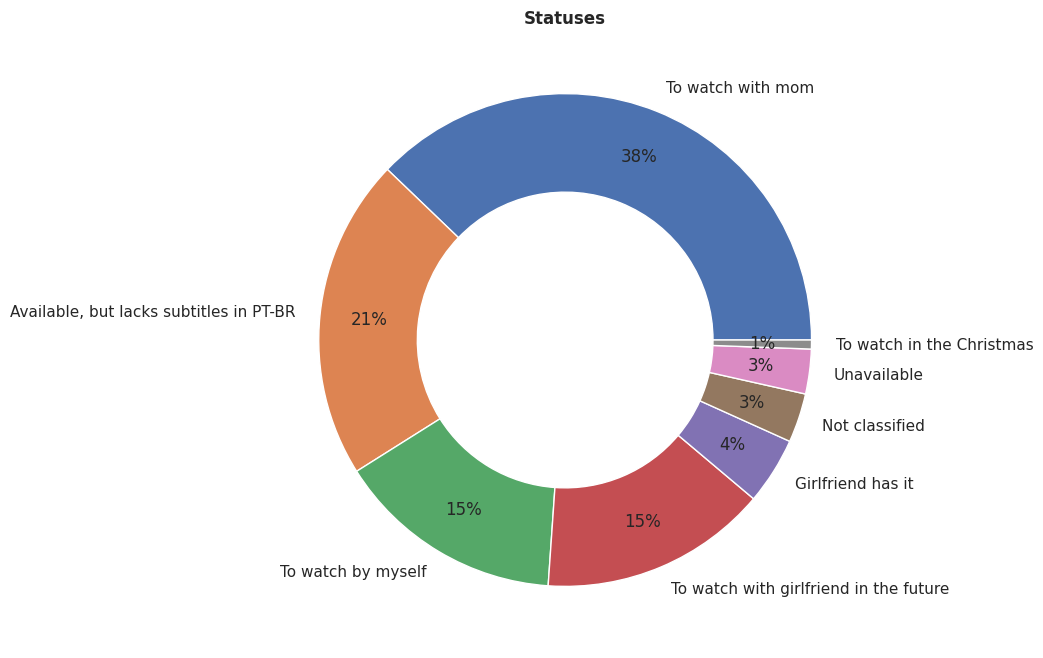

In [9]:
# Displaying the statuses present in the dataset:
wl['Status'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Statuses', fontweight = 'bold')
plt.show()

In [10]:
# Creating a datetime object based on the dates from the dataset:
wl['Date added'] = wl['Date added'].map(pd.to_datetime)
wl['Day added'] = wl['Date added'].apply(lambda x : x.day)
wl['Month added'] = wl['Date added'].apply(lambda x : x.month)
wl['Year added'] = wl['Date added'].apply(lambda x : x.year)
wl['Weekday added'] = wl['Date added'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date added      346 non-null    datetime64[ns]
 1   Title           346 non-null    object        
 2   Title Type      346 non-null    object        
 3   IMDb Rating     345 non-null    float64       
 4   Runtime (mins)  346 non-null    int64         
 5   Year            346 non-null    int64         
 6   Genres          346 non-null    object        
 7   Num Votes       346 non-null    int64         
 8   Release Date    346 non-null    object        
 9   Directors       342 non-null    object        
 10  Status          341 non-null    object        
 11  Day added       346 non-null    int64         
 12  Month added     346 non-null    int64         
 13  Year added      346 non-null    int64         
 14  Weekday added   346 non-null    int64         
dtypes: dat

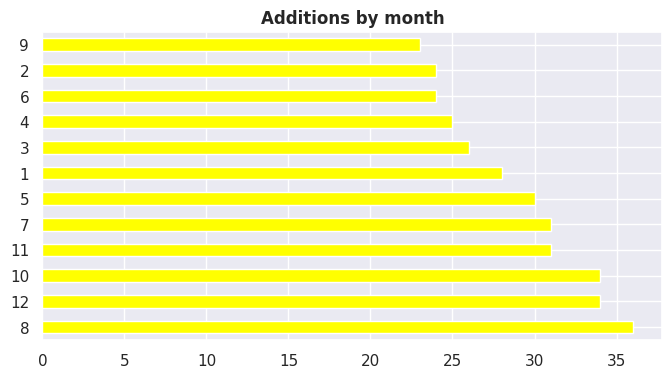

In [11]:
# Displaying the months with most and less additions:
wl['Month added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

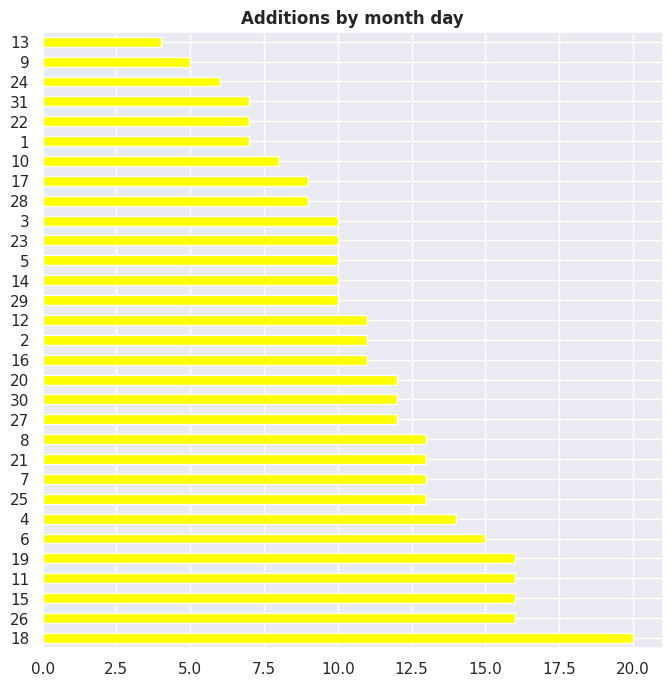

In [12]:
# Displaying the month days with most and less additions:
wl['Day added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

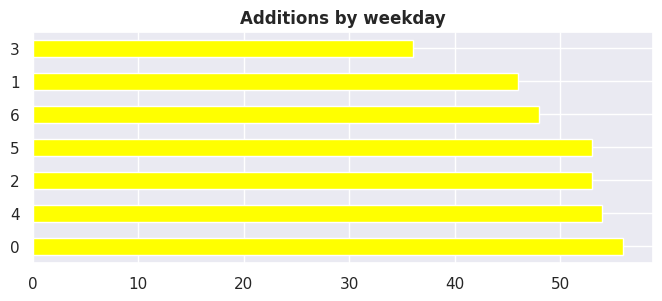

In [13]:
# Displaying the weekdays with most and less additions:
wl['Weekday added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

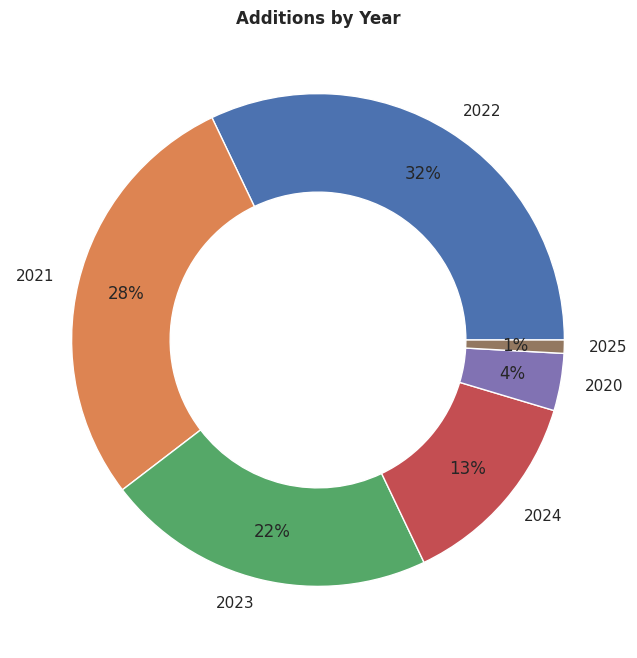

In [14]:
# Displaying the years with most and less additions:
wl['Year added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

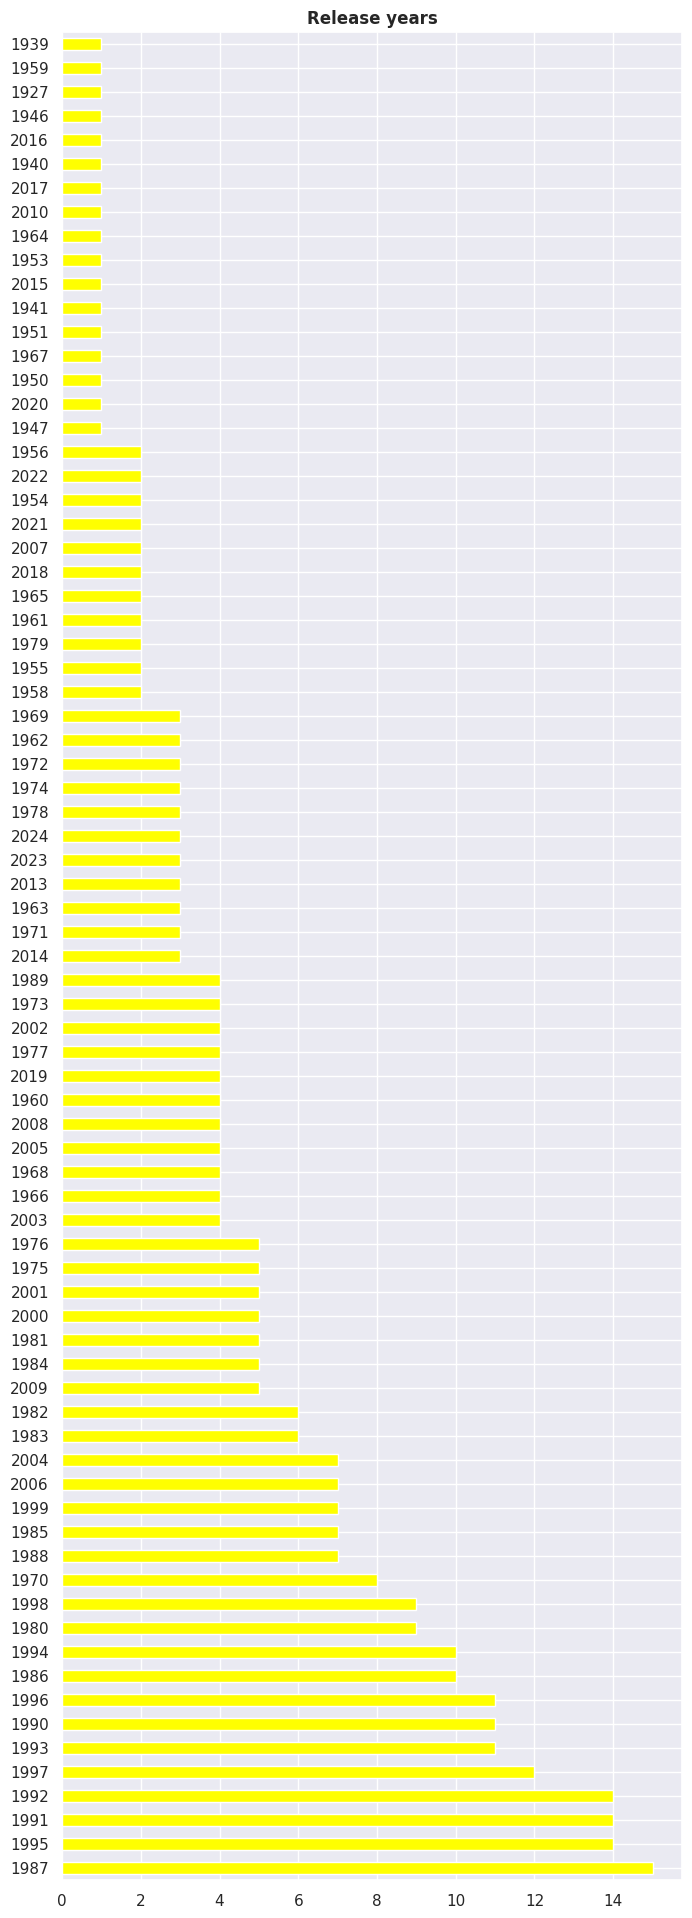

In [15]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

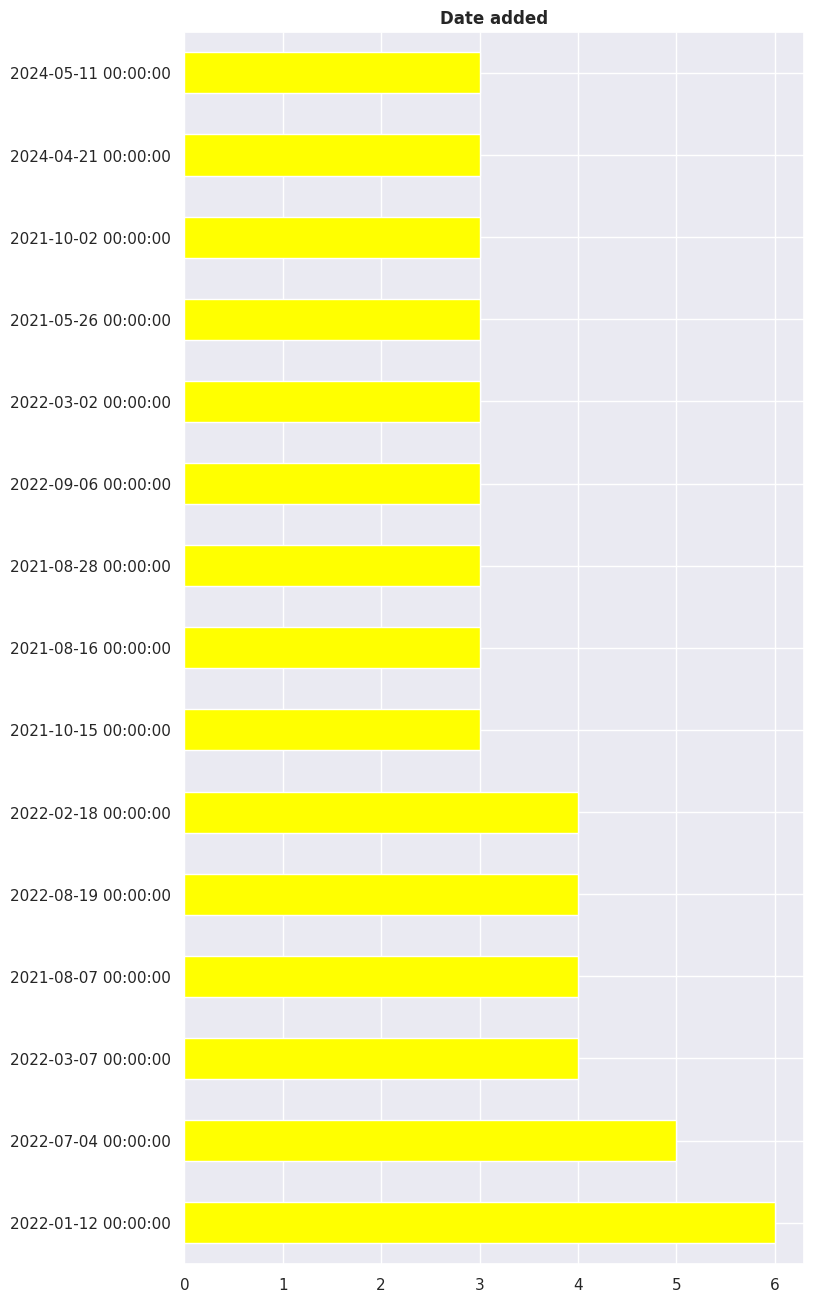

In [16]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
filtered_wl = wl.groupby('Date added').filter(lambda x: len(x) > 2)

# Displaying dates with most additions:
filtered_wl['Date added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [17]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade
0,2024-04-18,Brian's Song,TV Movie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s
2,2022-10-30,When They See Us,TV Miniseries,8.8,75,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s
3,2021-12-05,Lady and the Tramp,Movie,7.3,76,1955,"Animation, Adventure, Comedy, Family, Musical,...",148510,1955-06-16 00:00:00,"Clyde Geronimi, Wilfred Jackson, Hamilton Lusk...",To watch by myself,5,12,2021,6,1950s
4,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19 00:00:00,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s


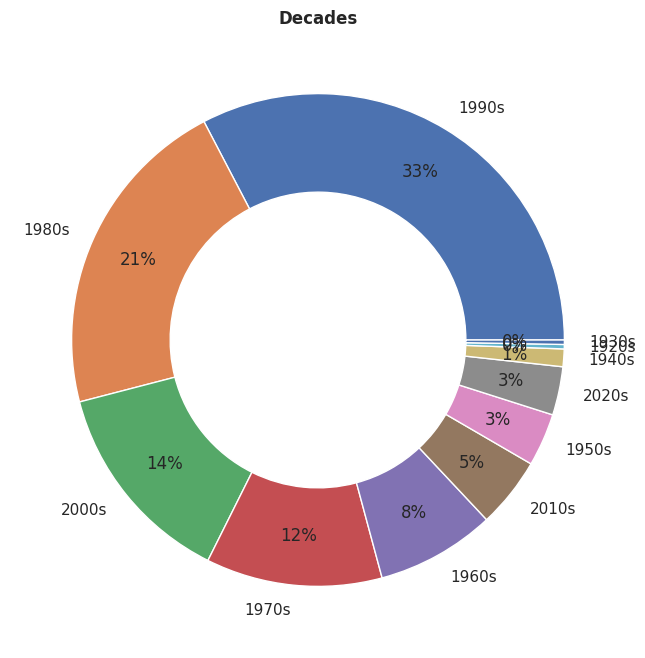

In [18]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [19]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality
0,2024-04-18,Brian's Song,TV Movie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s,Good
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing
2,2022-10-30,When They See Us,TV Miniseries,8.8,75,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s,Amazing
3,2021-12-05,Lady and the Tramp,Movie,7.3,76,1955,"Animation, Adventure, Comedy, Family, Musical,...",148510,1955-06-16 00:00:00,"Clyde Geronimi, Wilfred Jackson, Hamilton Lusk...",To watch by myself,5,12,2021,6,1950s,Good
4,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19 00:00:00,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay


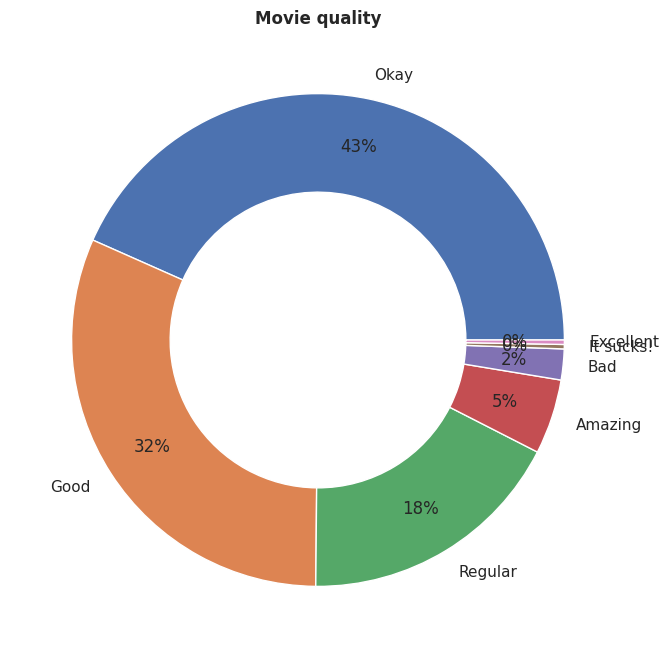

In [20]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [21]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity
0,2024-04-18,Brian's Song,TV Movie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s,Good,Less than 250k votes
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes
2,2022-10-30,When They See Us,TV Miniseries,8.8,75,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s,Amazing,Less than 250k votes
3,2021-12-05,Lady and the Tramp,Movie,7.3,76,1955,"Animation, Adventure, Comedy, Family, Musical,...",148510,1955-06-16 00:00:00,"Clyde Geronimi, Wilfred Jackson, Hamilton Lusk...",To watch by myself,5,12,2021,6,1950s,Good,Less than 250k votes
4,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19 00:00:00,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes


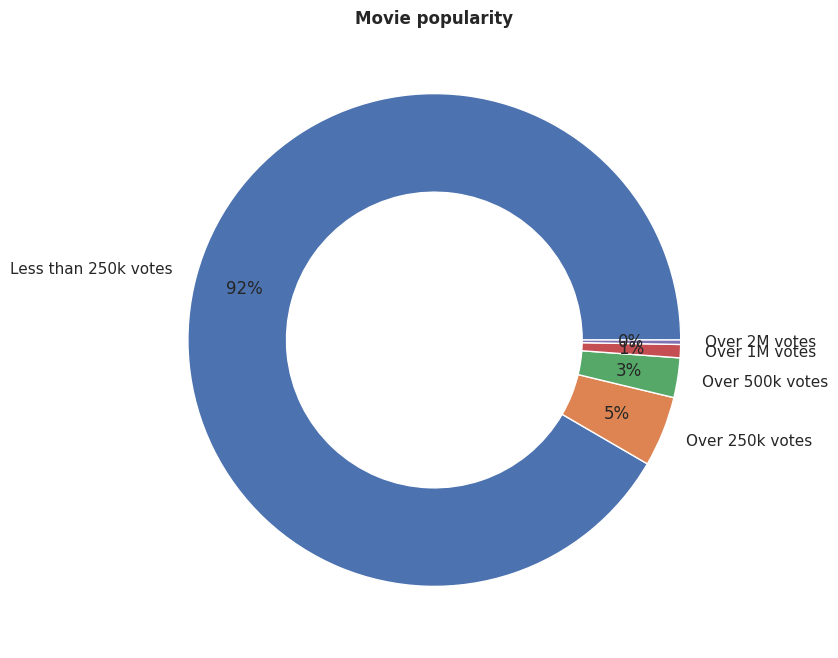

In [22]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [23]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration
0,2024-04-18,Brian's Song,TV Movie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s,Good,Less than 250k votes,Between 1h10 and 1h29
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29
2,2022-10-30,When They See Us,TV Miniseries,8.8,75,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s,Amazing,Less than 250k votes,Between 1h10 and 1h29
3,2021-12-05,Lady and the Tramp,Movie,7.3,76,1955,"Animation, Adventure, Comedy, Family, Musical,...",148510,1955-06-16 00:00:00,"Clyde Geronimi, Wilfred Jackson, Hamilton Lusk...",To watch by myself,5,12,2021,6,1950s,Good,Less than 250k votes,Between 1h10 and 1h29
4,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19 00:00:00,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29


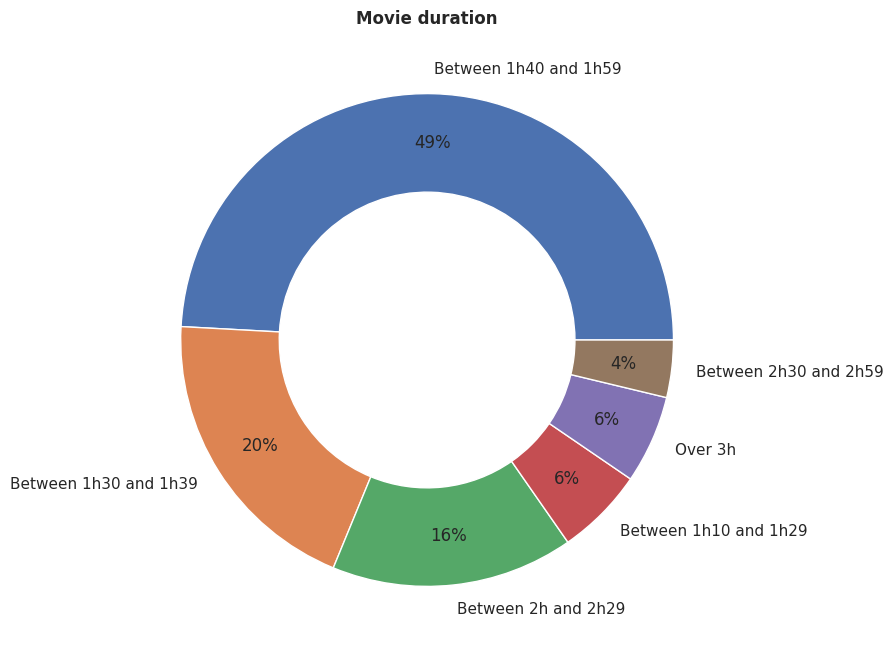

In [24]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month added'].apply(year_quartile)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2024-04-18,Brian's Song,TV Movie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s,Good,Less than 250k votes,Between 1h10 and 1h29,Second
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth
2,2022-10-30,When They See Us,TV Miniseries,8.8,75,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth
3,2021-12-05,Lady and the Tramp,Movie,7.3,76,1955,"Animation, Adventure, Comedy, Family, Musical,...",148510,1955-06-16 00:00:00,"Clyde Geronimi, Wilfred Jackson, Hamilton Lusk...",To watch by myself,5,12,2021,6,1950s,Good,Less than 250k votes,Between 1h10 and 1h29,Fourth
4,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19 00:00:00,"Art Stevens, Wolfgang Reitherman, John Lounsbery",To watch with girlfriend in the future,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second


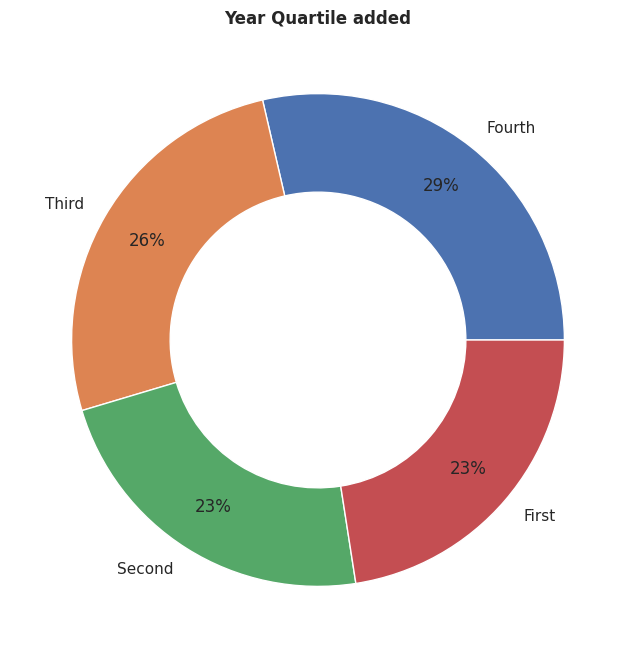

In [26]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [27]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day added'].apply(month_half)
wl.head()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day added,Month added,Year added,Weekday added,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2024-04-18,Brian's Song,TV Movie,7.5,73,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,...,18,4,2024,3,1970s,Good,Less than 250k votes,Between 1h10 and 1h29,Second,Second
1,2021-11-26,Roots,TV Miniseries,8.4,74,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,...,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth,Second
2,2022-10-30,When They See Us,TV Miniseries,8.8,75,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,...,30,10,2022,6,2010s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth,Second
3,2021-12-05,Lady and the Tramp,Movie,7.3,76,1955,"Animation, Adventure, Comedy, Family, Musical,...",148510,1955-06-16 00:00:00,"Clyde Geronimi, Wilfred Jackson, Hamilton Lusk...",...,5,12,2021,6,1950s,Good,Less than 250k votes,Between 1h10 and 1h29,Fourth,First
4,2020-05-15,The Rescuers,Movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19 00:00:00,"Art Stevens, Wolfgang Reitherman, John Lounsbery",...,15,5,2020,4,1970s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second,First


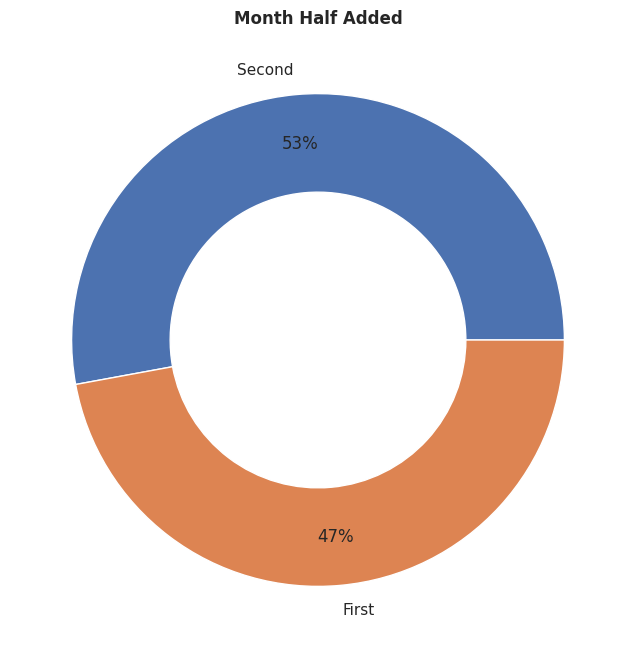

In [28]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [29]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [30]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         301    45
Adventure      291    55
Animation      341     5
Biography      307    39
Comedy         218   128
Crime          281    65
Documentary    340     6
Drama           96   250
Family         308    38
Fantasy        325    21
Film-Noir      344     2
History        321    25
Horror         338     8
Music          331    15
Musical        342     4
Mystery        326    20
Romance        264    82
Sci-Fi         321    25
Sport          322    24
Thriller       296    50
War            322    24
Western        334    12


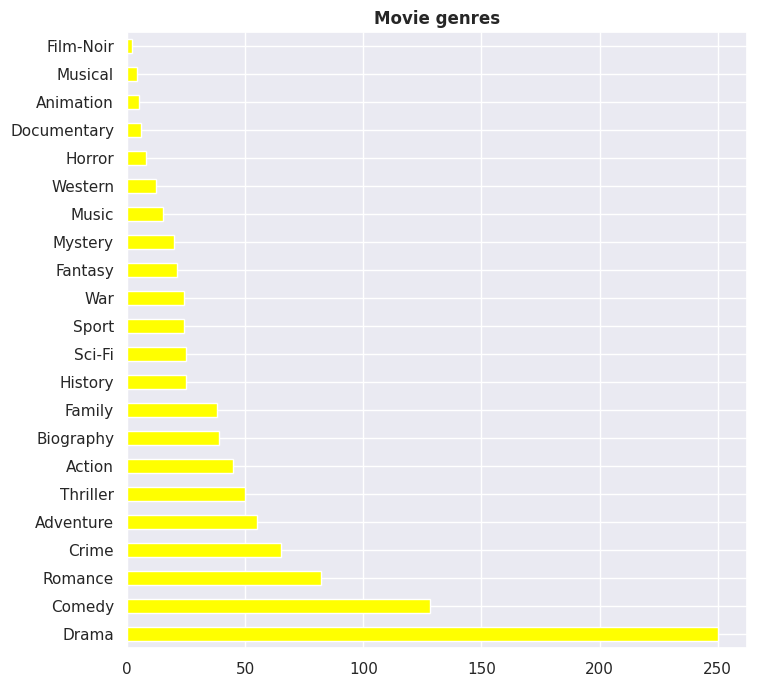

In [31]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [32]:
wl = wl[wl['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = wl.index, columns = wl['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-32-96bf50eac1cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [33]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Alan Shapiro           341     0
Albert Band            341     0
Albert Magnoli         341     0
Alex Segal             341     0
Alexandre Rockwell     341     1
...                    ...   ...
Wilfred Jackson        341     0
William Wyler          341     0
Wolfgang Petersen      341     0
Wolfgang Reitherman    341     0
Zoltan Korda           341     1

[313 rows x 2 columns]


In [34]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
# Displaying dates with most additions:
dir = final_directors_counts[final_directors_counts['True'] > 1] # Filtering DataFrame based on values in 'True' column

# Check if 'dir' DataFrame is empty before plotting
if not dir.empty:
  dir['True'].sort_values(ascending=False).plot(kind='barh', color='yellow', figsize=(8, 4))
  plt.ylabel(None)
  plt.title('Movie directors', fontweight='bold')
  plt.show()
else:
  print("No directors found with more than 1 movies in the watchlist.")

No directors found with more than 1 movies in the watchlist.
